### Team ID : PNT2022TMID53202

# Visualizing and Predicting Heart Diseases with an Interactive Dashboard
Heart disease refers to any condition affecting the cardiovascular system. There are several different types of heart disease, and they affect the heart and blood vessels in different ways. Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1 cause of death in the US.

In this machine learning project, we will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

**Problem Statement**

*   Complete analysis of Heart Disease dataset.
*   To predict whether a person has a heart disease or not based on the various biological and physical parameters.

**Machine Learning Algorithms**

*  Logistic Regression
*  K-Nearest Neighbors Classifier
*  Random forest Classifier
*  Naive Bayes Classifier
*  Bagging Decision tree
*  Hard voting Classifier


Dataset: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

## Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset consits of 13 clinical parameters and a target result of the patient.

1  Age: in years

2  Sex: 1 = male; 0 = female

3  Chest pain type:

        Value 1: typical angina

        Value 2: atypical angina

        Value 3: non-anginal pain

        Value 4: asymptomatic

4  BP: resting blood pressure (in mm Hg on admission to the hospital)

5  Cholesterol : serum cholestoral in mg/dl

6  FBS: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7  EKG results: resting electrocardiographic results

        Value 0: normal

        Value 1: aving ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8  MAX HR: maximum heart rate achieved

9  Excercise angina: exercise induced angina (1 = yes; 0 = no)

10 ST Depression: refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

11 Slope of ST: oldpeak = ST depression induced by exercise relative to rest

12 Number of vessels fluro: number of major vessels (0-3) colored by flourosopy

13 Thallium: 3 = normal; 6 = fixed defect; 7 = reversable defect

14 Heart Disease : Presence or Absence


In [ ]:
#Reading the dataset
df = pd.read_csv(r'/content/Heart_Disease_Prediction.csv.xls')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
#Statistical Information
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
#Initial 5 values
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
#Last 5 values
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
#Dimension of dataset
df.shape

(270, 14)

In [ ]:
#Average Values of each parameter of dataset
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Age                         54.433333
Sex                          0.677778
Chest pain type              3.174074
BP                         131.344444
Cholesterol                249.659259
FBS over 120                 0.148148
EKG results                  1.022222
Max HR                     149.677778
Exercise angina              0.329630
ST depression                1.050000
Slope of ST                  1.585185
Number of vessels fluro      0.670370
Thallium                     4.696296
dtype: float64

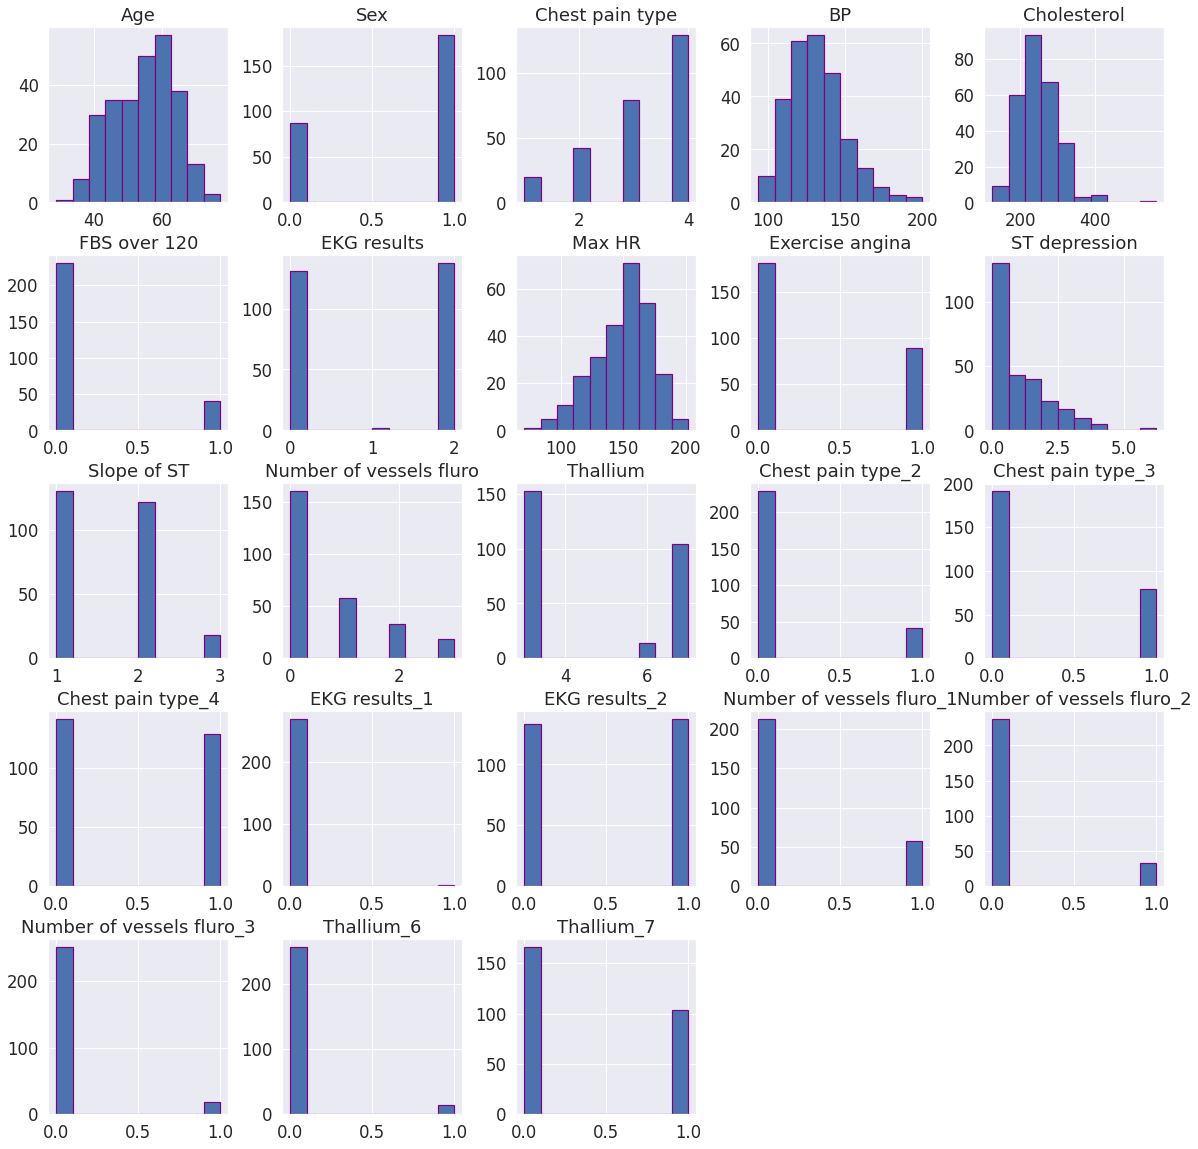

In [ ]:
#Visual representation
sns.set(font_scale=1.5)
df.hist(edgecolor='purple', linewidth=1.2, figsize=(20, 20));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


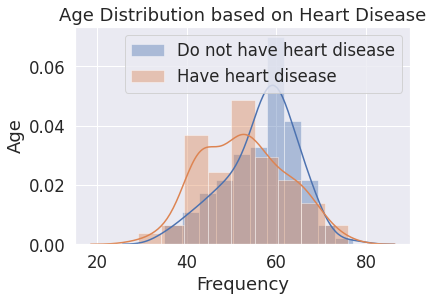

In [ ]:
#Exploring Affected Patients with Age as a Factor

sns.distplot(df[df['Heart Disease'] == "Presence"]['Age'], label='Do not have heart disease')
sns.distplot(df[df['Heart Disease'] == "Absence"]['Age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

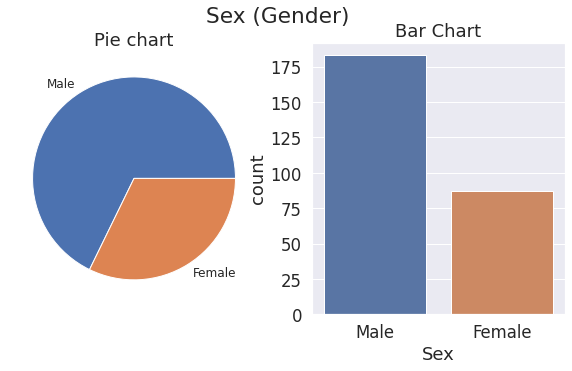

1    183
0     87
Name: Sex, dtype: int64
Gender is not a major factor for predicting the Heart Disease


In [ ]:
#Exploring Affected Patients with Sex as a Factor

labels = ['Male', 'Female']
order = df['Sex'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Sex (Gender)")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Sex'].value_counts(), labels=labels, textprops={'fontsize':12})

plt.subplot(1,2,2)
plt.title('Bar Chart')
sns.countplot(x='Sex', data=df, order=order)
plt.xticks([0, 1], labels)

plt.show()

print(df['Sex'].value_counts())
print("Gender is not a major factor for predicting the Heart Disease")

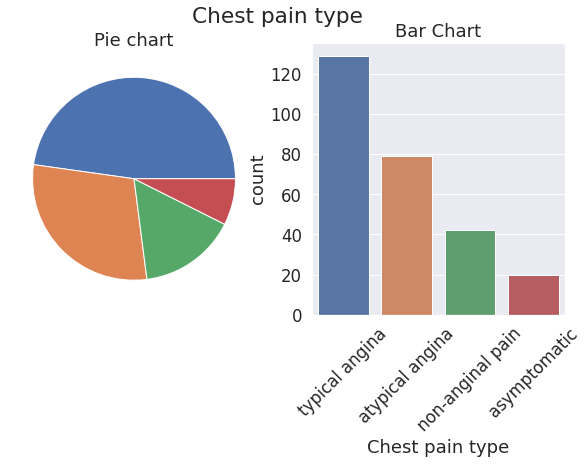

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [ ]:
#Exploring Affected Patients with Type of Chest Pain as a Factor

labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
order = df['Chest pain type'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Chest pain type")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Chest pain type'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Bar Chart')
sns.countplot(x='Chest pain type', data=df, order=order)
plt.xticks([0,1,2,3], labels, rotation=45)

plt.show()

df['Chest pain type'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


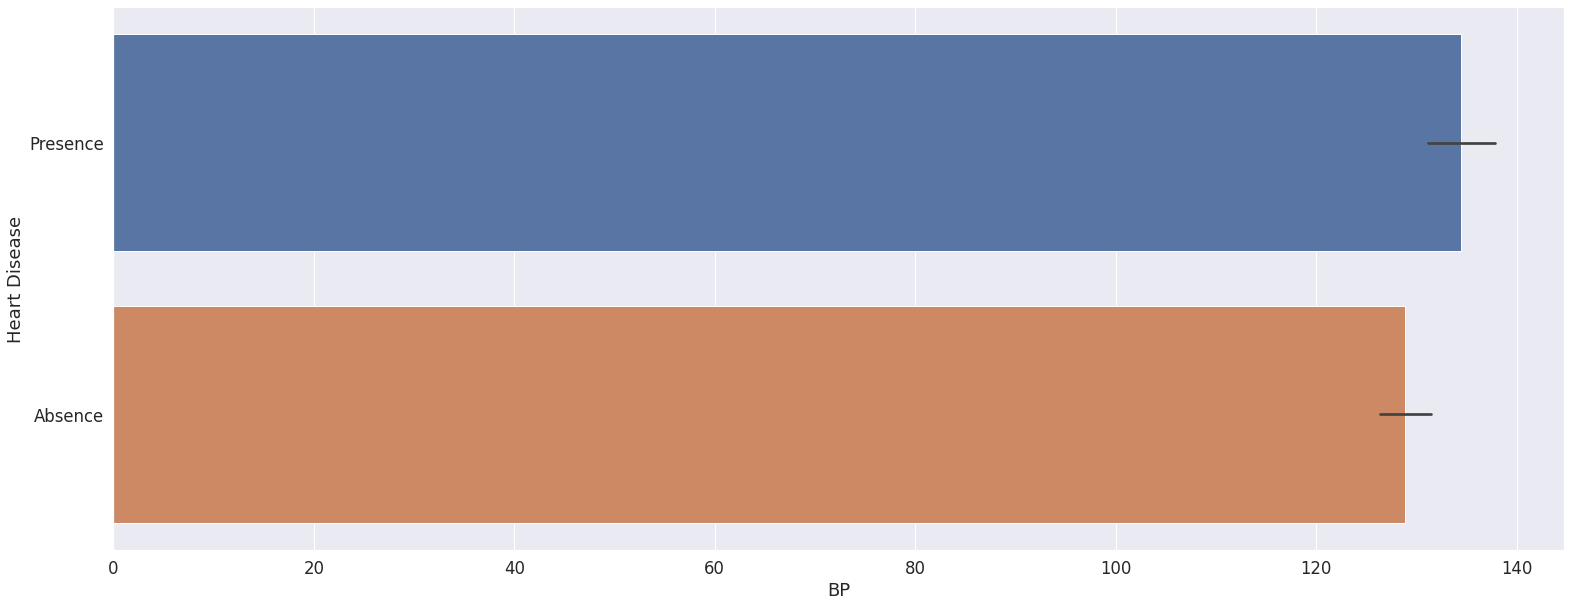

In [ ]:
#Exploring Affected Patients with Blood Pressure as a Factor

plt.figure(figsize=(26, 10))
sns.barplot(df['BP'],df['Heart Disease'])

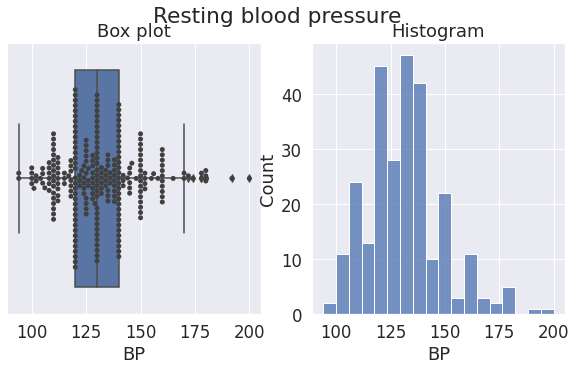

The average resting heart rate: 131.34 It can be observed that histogram is skewed to right side


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Resting blood pressure")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="BP", data=df)
sns.swarmplot(x="BP", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='BP', data=df)
plt.show()

print("The average resting heart rate: %2.2f It can be observed that histogram is skewed to right side" % (df["BP"].mean()))

In [ ]:
#Exploring Affected Patients with Cholestral as a Factor

df=df.copy()
D = df[(df['Heart Disease'] != "Presence")]
H = df[(df['Heart Disease'] == "Presence")]


import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import plotly.figure_factory as ff
def plot_distribution(data_select, size_bin) :  

    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Absence of Heart Disease', 'Presence of Heart Disease']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    iplot(fig, filename = 'Density plot')

In [ ]:
plot_distribution('Cholesterol', 1)

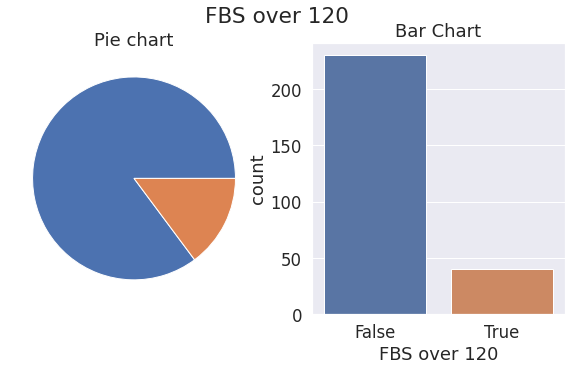

0    230
1     40
Name: FBS over 120, dtype: int64

In [ ]:
#Exploring Affected Patients with Fasting Blood Sugar as a Factor

labels = ["False", 'True']
order = df['FBS over 120'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("FBS over 120")

plt.subplot(1,2,2)
plt.title('Bar Chart')
sns.countplot(x='FBS over 120', data=df, order=order)
plt.xticks([0,1], labels=labels)

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['FBS over 120'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)



plt.show()

df['FBS over 120'].value_counts()

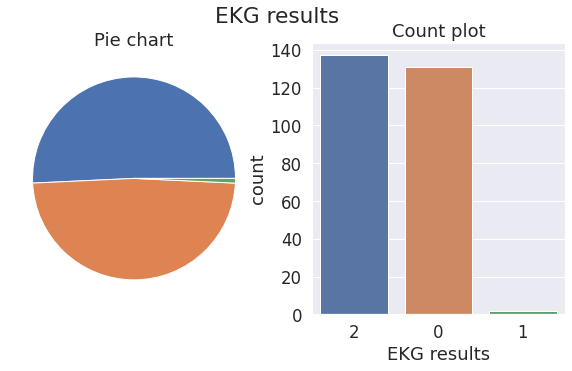

2    137
0    131
1      2
Name: EKG results, dtype: int64

In [ ]:
#Exploring Affected Patients with EKG Results as a Factor

labels = ["normal", 'aving ST-T wave abnormality', "showing probable or definite left ventricular hypertrophy by Estes' criteria"]
order = df['EKG results'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("EKG results")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['EKG results'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='EKG results', data=df, order=order)
#plt.xticks([0,1,2], labels=labels, rotation=45)

plt.show()

df['EKG results'].value_counts()

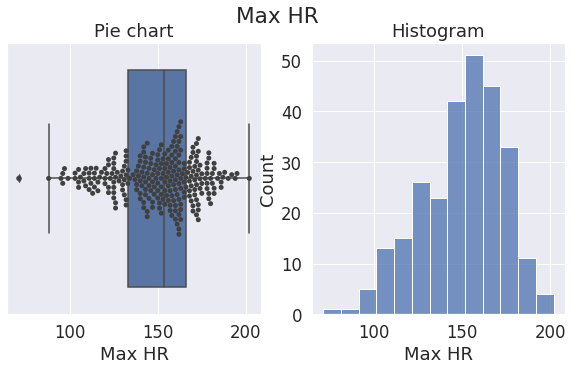

The max heart rate: 149.68 The histogram is slightly left skewed


In [ ]:
#Exploring Affected Patients with MAX HR as a Factor

plt.figure(figsize=(10,5))
plt.suptitle("Max HR")

plt.subplot(1,2,1)
plt.title('Pie chart')
sns.boxplot(x="Max HR", data=df)
sns.swarmplot(x="Max HR", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Max HR', data=df)
plt.show()

print("The max heart rate: %2.2f The histogram is slightly left skewed" % (df["Max HR"].mean()))

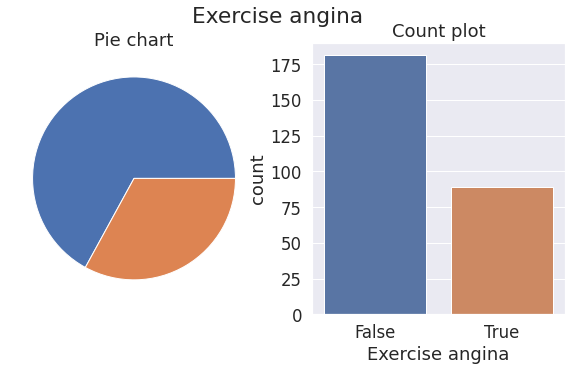

0    181
1     89
Name: Exercise angina, dtype: int64

In [ ]:
#Exploring Affected Patients with Exercise Angina as a Factor

labels = ["False", 'True']
order = df['Exercise angina'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Exercise angina")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Exercise angina'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Exercise angina', data=df, order=order)
plt.xticks([0,1], labels=labels)

plt.show()

df['Exercise angina'].value_counts()

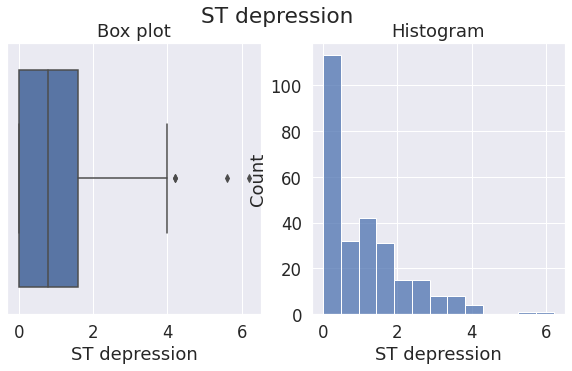

In [ ]:
#Exploring Affected Patients with ST Depression as a Factor

plt.figure(figsize=(10,5))
plt.suptitle("ST depression")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="ST depression", data=df)

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='ST depression', data=df)
plt.show()


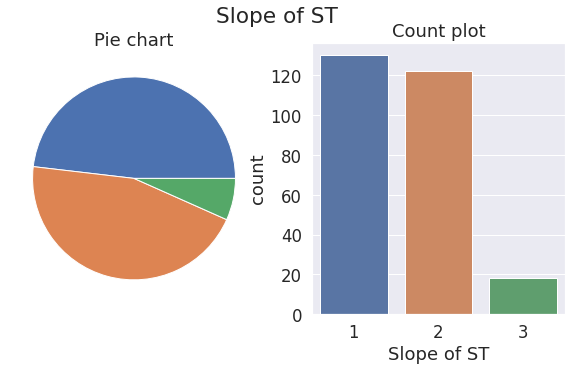

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

In [ ]:
#Exploring Affected Patients with Slope Of ST as a Factor

labels = ["1", '2', '3']
order = df['Slope of ST'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Slope of ST")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Slope of ST'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Slope of ST', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()

df['Slope of ST'].value_counts()

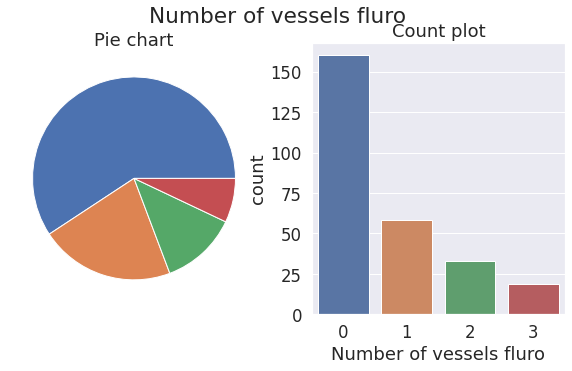

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

In [ ]:
#Exploring Affected Patients with Number of vessels fluro as a Factor

labels = ["0", '1', '2', "3"]
order = df['Number of vessels fluro'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Number of vessels fluro")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Number of vessels fluro'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Number of vessels fluro', data=df, order=order)
plt.xticks([0,1,2,3], labels=labels)

plt.show()

df['Number of vessels fluro'].value_counts()

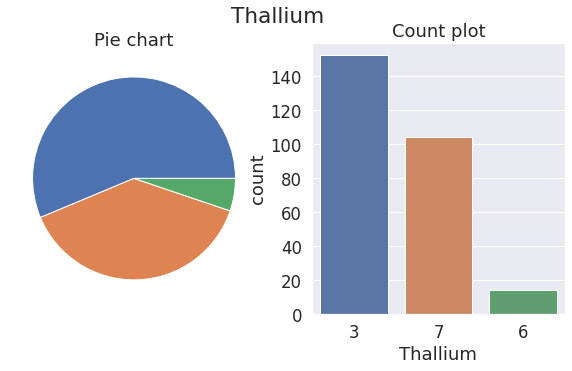

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [ ]:
#Exploring Affected Patients with Number of Thallium as a Factor

labels = ["3", '7', '6']
order = df['Thallium'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Thallium")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Thallium'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Thallium', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()

df['Thallium'].value_counts()

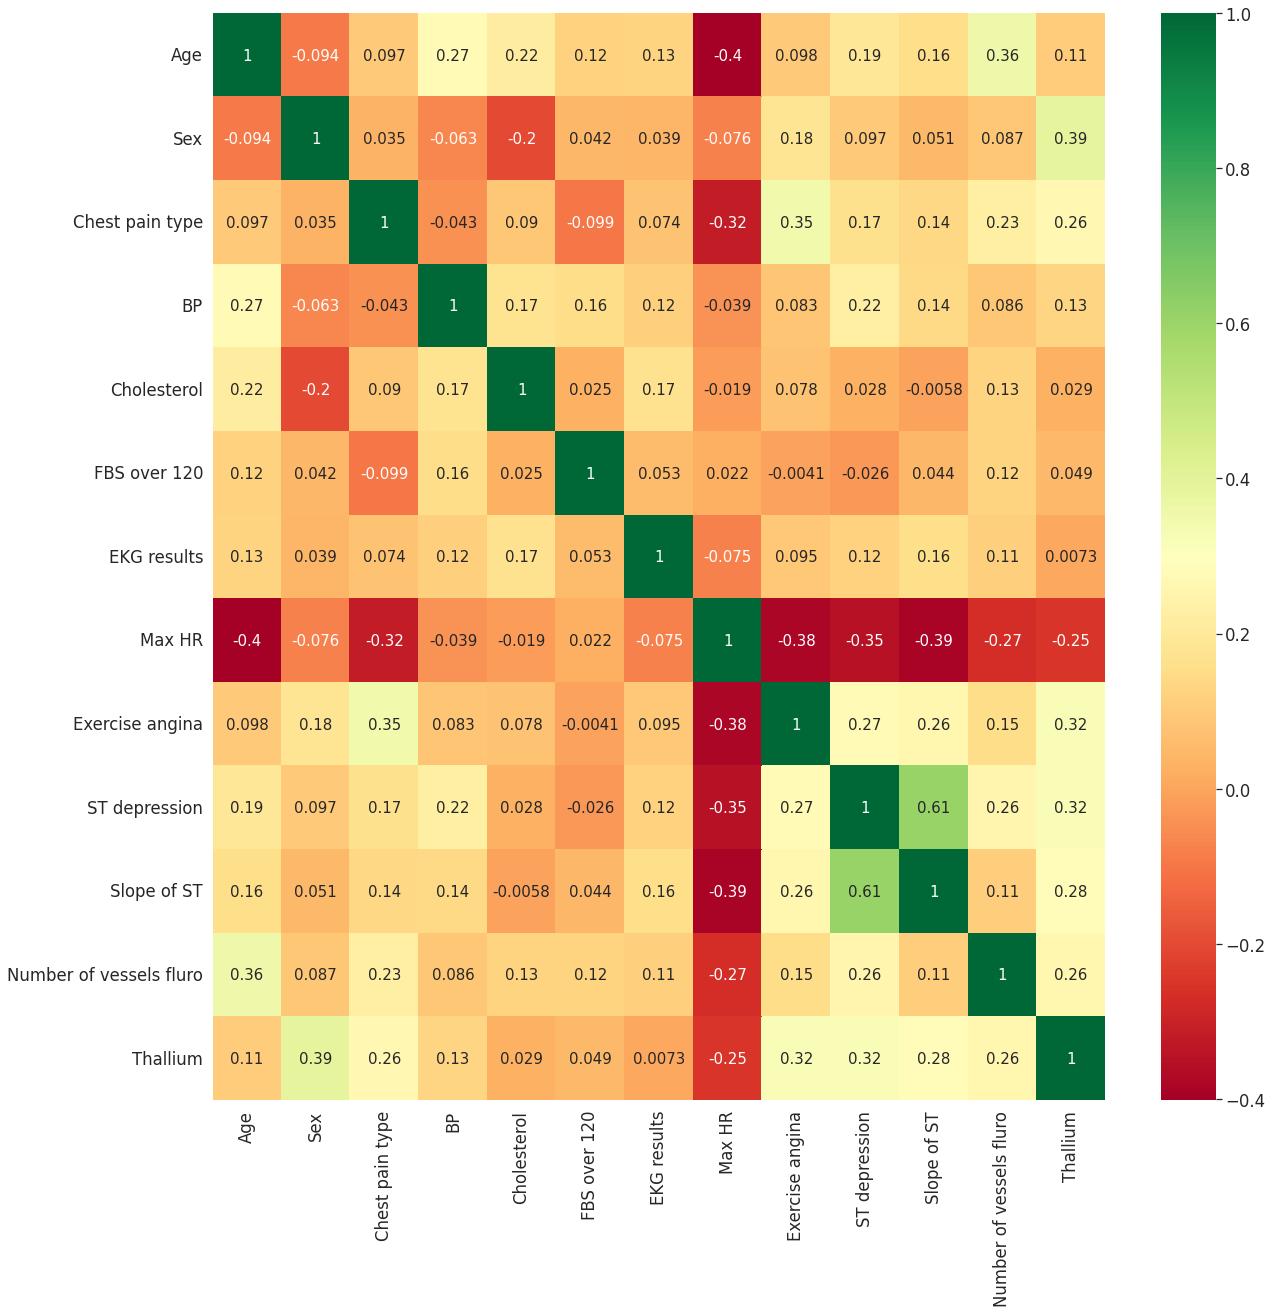

In [ ]:
# Correlation Matrix
# The best way to compare relationship between various features is to look at the correlation matrix between those features.

corr_matrix = df.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## EDA (Esploratory Data Analysis)

In [ ]:
#Converting object targets to boolean

target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

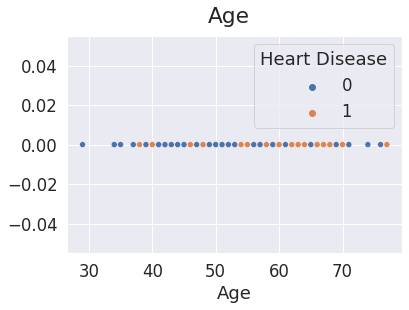

In [ ]:
#Age Analysis

plt.suptitle("Age")
sns.scatterplot(data=df, x='Age', y=np.zeros(len(df['Age'])), hue=target)
plt.show()

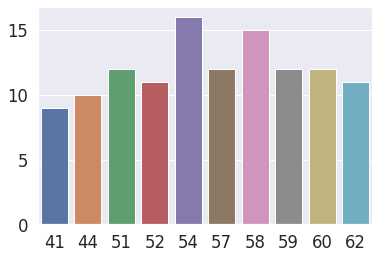

In [ ]:
data=df
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.show()

In [ ]:
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



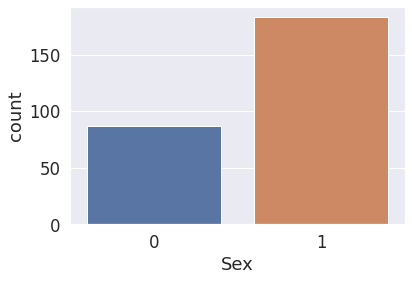

In [ ]:
#Sex Feature Analysis

sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['Sex'])
plt.show()

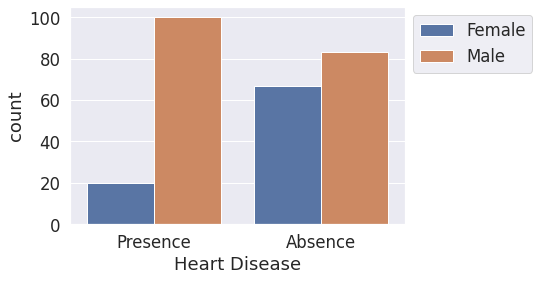

In [ ]:
ax = sns.countplot(x='Heart Disease', hue='Sex', data=df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Female','Male'], bbox_to_anchor=(1,1))
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



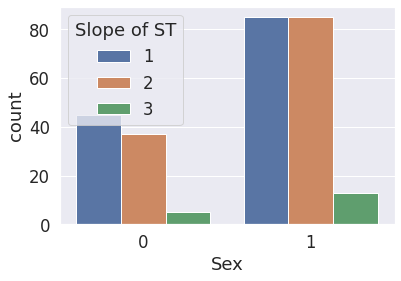

In [ ]:
sns.countplot(data['Sex'],hue=data["Slope of ST"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



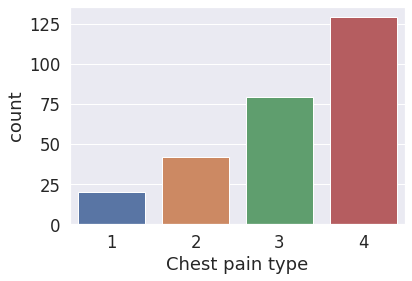

 4th type of chest pain dominate in heart disease


In [ ]:
#Chest Pain Type Analysis

sns.countplot(data['Chest pain type'])
plt.show()
print(" 4th type of chest pain dominate in heart disease")

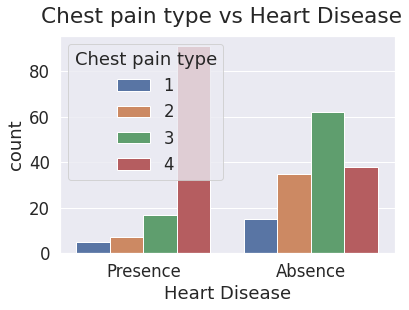

In [ ]:
plt.suptitle('Chest pain type vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Chest pain type')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



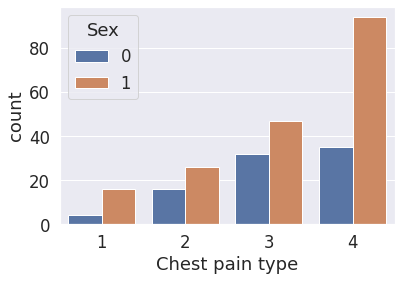

In [ ]:
sns.countplot(data['Chest pain type'],hue=data["Sex"])
plt.show()


People having least chest pain are not likely to heart disease.
People having severe chest pain are likely to heart disease

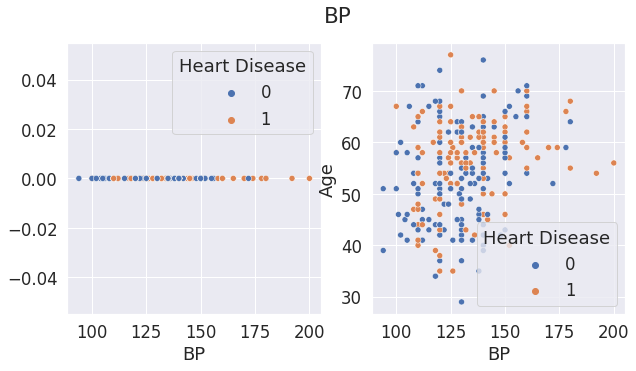

In [ ]:
# Heart Disease based on BP 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.suptitle("BP")
sns.scatterplot(data=df, x='BP', y=np.zeros(len(df['BP'])), hue=target)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='BP', y='Age', hue=target)


plt.show()

Persons with high BP have more chance to get heart disease


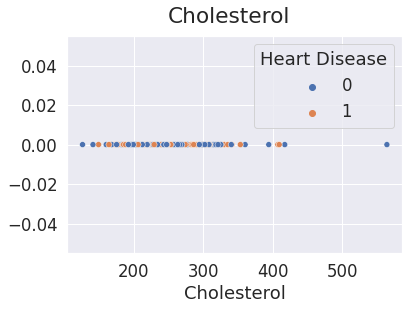

In [ ]:
# Cholesterol

plt.suptitle("Cholesterol")
sns.scatterplot(data=df, x='Cholesterol', y=np.zeros(len(df['Cholesterol'])), hue=target)
plt.show()

Higer Cholesterol does not influence on heart disease


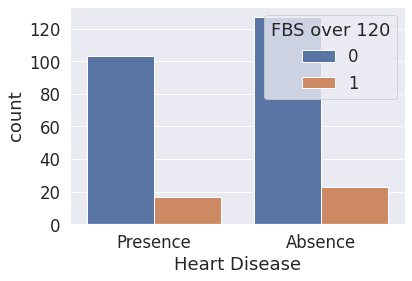

In [ ]:
# FBS over 120 

ax = sns.countplot(x='Heart Disease', hue='FBS over 120', data=df)
sns.set_context('notebook',font_scale = 0.5)
plt.show()

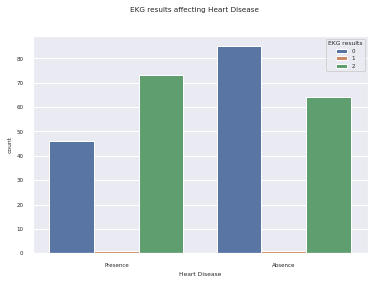

In [ ]:
#EKG results

plt.suptitle('EKG results affecting Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='EKG results')
plt.show()

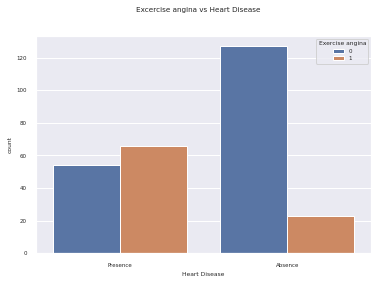

In [ ]:
#Excercise angina

plt.suptitle('Excercise angina vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Exercise angina')
plt.show()

Chest pain after a high excercise intensity or stress can casues a presence of heart failure

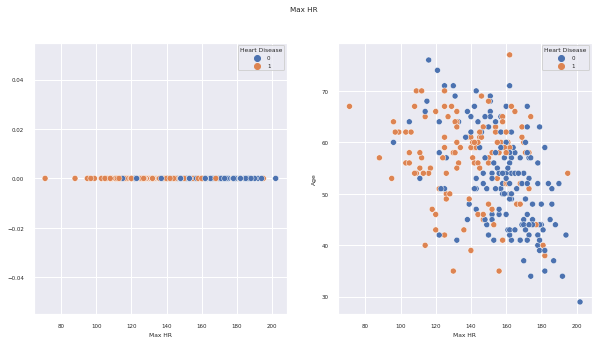

In [ ]:
#Max HR

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.suptitle("Max HR")
sns.scatterplot(data=df, x='Max HR', y=np.zeros(len(df['Max HR'])), hue=target)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Max HR', y='Age', hue=target)

plt.show()

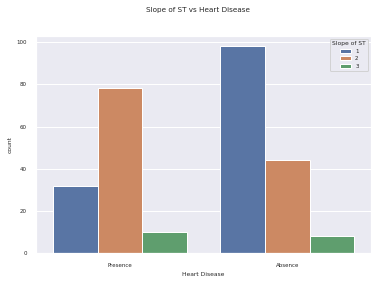

In [ ]:
#Slope of ST

plt.suptitle('Slope of ST vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Slope of ST')
sns.set_context(font_scale = 1)
plt.show()

Cleaning and Balancing the dataset

In [ ]:
Chest_pain_type = pd.get_dummies(df['Chest pain type'], prefix='Chest pain type', drop_first=True)
EKG_results = pd.get_dummies(df['EKG results'], prefix='EKG results', drop_first=True)
Number_of_vessels_fluro = pd.get_dummies(df['Number of vessels fluro'], prefix='Number of vessels fluro', drop_first=True)
Thallium = pd.get_dummies(df['Thallium'], prefix='Thallium', drop_first=True)

frames = [df, Chest_pain_type, EKG_results, Number_of_vessels_fluro, Thallium]
df = pd.concat(frames, axis=1)

df.drop(columns = ['Chest pain type', 'EKG results', 'Number of vessels fluro', 'Thallium', 'Slope of ST'])

target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [ ]:
one_target = int(np.sum(target))
zero_counter = 0
indices_to_remove = []

for i in range(target.shape[0]):
  if target[i] == 0:
    zero_counter += 1
    if zero_counter > one_target:
      indices_to_remove.append(i)

print("Indices before balancing data:", target.shape[0])
print("Idices to delete:", len(indices_to_remove))

Indices before balancing data: 270
Idices to delete: 30


In [ ]:
balanced_inputs = inputs.drop(indices_to_remove, axis=0)
balanced_targets = target.drop(indices_to_remove, axis=0)

#reset indices
reset_inputs = balanced_inputs.reset_index(drop=True)
reset_targets = balanced_targets.reset_index(drop=True)

print("Inputs after balancing data:", reset_inputs.shape[0])
print("Targets after balancing data:", reset_targets.shape[0])

balanced_inputs.head()

Inputs after balancing data: 240
Targets after balancing data: 240


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_1,EKG results_2,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7
0,70,1,4,130,322,0,2,109,0,2.4,...,0,0,1,0,1,0,0,1,0,0
1,67,0,3,115,564,0,2,160,0,1.6,...,0,1,0,0,1,0,0,0,0,1
2,57,1,2,124,261,0,0,141,0,0.3,...,1,0,0,0,0,0,0,0,0,1
3,64,1,4,128,263,0,0,105,1,0.2,...,0,0,1,0,0,1,0,0,0,1
4,74,0,2,120,269,0,2,121,1,0.2,...,1,0,0,0,1,1,0,0,0,0


## Machine Learning Models

Some of the machine learning models suitable for heart disease prediction are,

###  Logistic Regression 
###  Gaussian Naive Bayes
###  Random Forest Classifier
###  KNeighborsClassifier
###  Hard Voting Classifier
###  Bagging Decision Tree


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaled_inputs = MinMaxScaler().fit_transform(balanced_inputs)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, balanced_targets, test_size=0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



<Figure size 432x288 with 0 Axes>

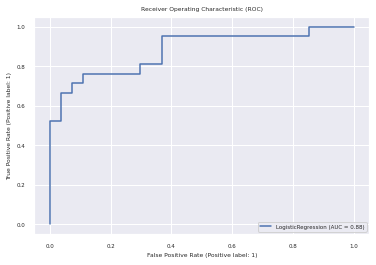

Logistic Regression score:  0.7916666666666666


In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve

logit = LogisticRegression()
logit.fit(X_train, y_train)

predicted_logit = logit.predict(X_test)

LogisticRegressionScore = accuracy_score(predicted_logit, y_test)


plt.figure()
metrics.plot_roc_curve(logit, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()

print("Logistic Regression score: ", LogisticRegressionScore)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



<Figure size 432x288 with 0 Axes>

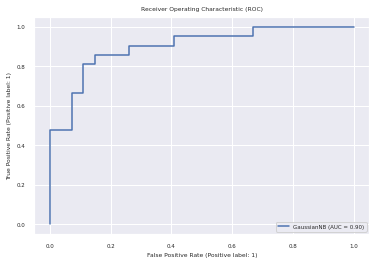

Gaussian Naive Bayes score:  0.8541666666666666


In [ ]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(X_train, y_train)

gauss_pred = gauss.predict(X_test)

gauss_score = accuracy_score(gauss_pred, y_test)


plt.figure()
metrics.plot_roc_curve(gauss, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()


print("Gaussian Naive Bayes score: ", gauss_score)

In [ ]:
# KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier


KNC = KNeighborsClassifier(n_neighbors=2)
KNC.fit(X_train, y_train)

KNC_pred = KNC.predict(X_test)

KNC_accuracy = metrics.accuracy_score(y_test, KNC_pred)

print("KNeighbourClassifier score: ", KNC_accuracy)

KNeighbourClassifier score:  0.8541666666666666


In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

rnd_clf_pred = rnd_clf.predict(X_test)

rnd_clf_accuracy = metrics.accuracy_score(y_test, rnd_clf_pred)
print("RandomForest score: ", rnd_clf_accuracy)

RandomForest score:  0.7708333333333334


In [ ]:
# Bagging Decision Tree

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, oob_score=True,
    max_samples=100, bootstrap = True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

bag_clf_oob = bag_clf.oob_score_

bag_clf_pred = bag_clf.predict(X_test)
bag_clf_accuracy = metrics.accuracy_score(y_test, bag_clf_pred)
print("Bagging Decision Tree score: ", bag_clf_accuracy, "Out of the bag: ", bag_clf_oob)

Bagging Decision Tree score:  0.7708333333333334 Out of the bag:  0.8125


In [ ]:
# Hard Voting Classifier

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators = [('gauss',gauss), ('logit', logit), ('KN', KNC), ('bag', bag_clf), ("rnd_clf", rnd_clf)], 
    voting = 'soft'
)

voting_clf.fit(X_train, y_train)

voting_clf_pred = bag_clf.predict(X_test)
voting_clf_accuracy = metrics.accuracy_score(y_test, voting_clf_pred)
print("Voting Classifier score: ", voting_clf_accuracy)

Voting Classifier score:  0.7708333333333334
